<a href="https://colab.research.google.com/github/safkodja/safkodja/blob/main/HW_REGRESSION_MUHAMAD_SAFTIAN_KODJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load the Data**

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Work/Day-16/1653227978861-boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##Split Data

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, 
                                                                                      target, 
                                                                                      test_size=0.20, 
                                                                                      random_state=42)

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are several features with high VIF scores **(Have indicates of Moderate Multicollinearity)**:
1. `nox`
2. `dis`
3. `rad`
4. `tax`

##Draw correlation plot

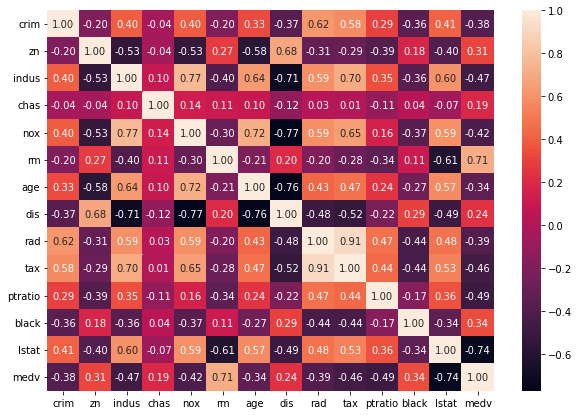

In [ ]:
# heatmap correlation
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

We have 2 independent variables that have a correlation of more than 0.8. Therefore, we need to drop:
* `rad`
* `tax`

In [ ]:
# drop redundant features
feature_df_train = feature_df_train.drop(columns=['rad','tax'])
feature_df_test = feature_df_test.drop(columns=['rad','tax'])

In [ ]:
#Recheck VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.411910
2,zn,2.233054
3,indus,3.229591
4,chas,1.083338
5,nox,3.988711
6,rm,1.866058
7,age,2.951810
8,dis,4.159840
9,ptratio,1.492126
10,black,1.288546


We still have features with high VIF scores **(Have indicates of Moderate Multicollinearity)**:
* `dis`

So, we have to recheck the correlation between variabels.

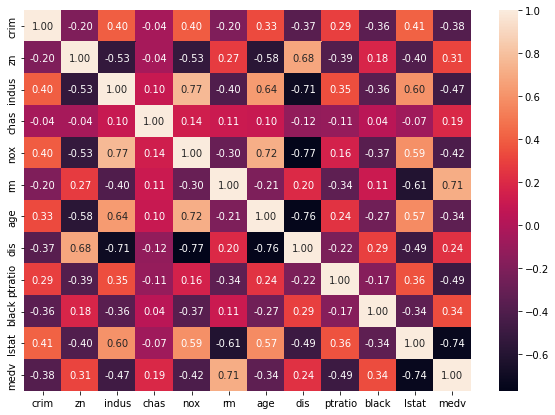

In [ ]:
#Recheck heatmap correlation
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Finally we don't have independent variables that have a correlation of more than 0,8.

##Fit models on training data (lambdas = [0.01, 0.1, 1, 10])

Split data: train-validation-test

In [ ]:
#split train test again for choose the best lambda
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature,
                                                                                            target, 
                                                                                            test_size=0.20, 
                                                                                            random_state=42)

feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, 
                                                                                                  target_df_pretrain, 
                                                                                                  test_size=0.20, 
                                                                                                  random_state=42)

In [ ]:
#Drop Multicollinear Features
feature_df_validation = feature_df_validation.drop(columns=['rad','tax'])


###Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

###Lasso

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_pointone = Lasso(alpha=0.1, random_state=42)
lasso_one = Lasso(alpha=1, random_state=42)
lasso_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_pointzeroone.fit(X_df_train, y_df_train)
lasso_pointone.fit(X_df_train, y_df_train)
lasso_one.fit(X_df_train, y_df_train)
lasso_ten.fit(X_df_train, y_df_train)

Lasso(alpha=10, random_state=42)

##Choose the best lambda from the validation set

###1. Ridge regression

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

ValueError: ignored

Interpretation:
With Ridge Regression, we get the best lambda when alpha is 10. Because the values of RMSE when Lambda 10 is smaller than others. Thats meaning the standard deviation of predictions errors is 4,867.

In [ ]:
#Show the coeficient by the best lambda
ridge_best = ridge_reg_ten

ridge_coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

ridge_coef_df

,feature,coefficient
0,intercept,18.386848
1,crim,-0.100071
2,zn,0.040256
3,indus,-0.023681
4,chas,1.745834
5,nox,-1.666441
6,rm,4.602393
7,age,-0.010352
8,dis,-1.246976
9,rad,0.214226


This is coeficient of model with rifge regressions when we use the best lambda.

###2. Lasso

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_pointzeroone,
          lasso_pointone,
          lasso_one,
          lasso_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso model with alpha = {alpha} is {rmse}')

ValueError: ignored

Interpretation:
With Lasso, we get the best lambda when alpha is 1. Because the values of RMSE when Lambda 1 is smaller than others. Thats meaning the standard deviation of predictions errors is 4,846.

In [ ]:
#Show the coeficient by the best lambda
lasso_best = lasso_one

lasso_coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

lasso_coef_df

This is coeficient of model with lasso when we use the best lambda.

##Evaluate the best models on the test data

###  Ridge Regression




In [ ]:
#Checking the r2 score from the best model Ridge Regression
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.7482098309161346


We get thats R-squared is 0.735. Thats meaning 73,53% of variabillity of `medv` is successfully explained using all the features in the model. And thats good for using this model

####Training Error (Ridge Regression)

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 4.782228475318233
MAE for training data is 3.389406834761317
MAPE for training data is 0.16973868172428838


From this tarin, we get can say:
*   RMSE: The standard deviation of predictions errors is 4,796 from the regression line, the residuals mostly deviate between +- 4,796.
*   MAE: On average, our predictions deviates the true `medv` by 3,344.
*   MAPE: Moreover, this is equivalent to 16.61% deviation relative to the true `medv`.


####Testing Error (Ridge Regression)

In [ ]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 5.1603544653640565
MAE for testing data is 3.254717665955977
MAPE for testing data is 0.17738239090917854


From this testing by use the best lambda, we get can say:
*   RMSE: The standard deviation of predictions errors is 5,135 from the regression line, the residuals mostly deviate between +- 5,135.
*   MAE: On average, our predictions deviates the true `medv` by 3,260.
*   MAPE: Moreover, this is equivalent to 17.56% deviation relative to the true `medv`.





###  Lasso




In [ ]:
#Checking the r2 score from the best model Lasso
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.7051179504576279


We get thats R-squared is 0.688. Thats meaning 68,83% of variabillity of `medv` is successfully explained using all the features in the model. And thats good for using this model

####Training Error (Lasso)

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_df_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 5.175294931416954
MAE for training data is 3.697337156294457
MAPE for training data is 0.17599998574534498


From this train, we get can say:
*   RMSE: The standard deviation of predictions errors is 5.204 from the regression line, the residuals mostly deviate between +- 5.204.
*   MAE: On average, our predictions deviates the true `medv` by 3.691.
*   MAPE: Moreover, this is equivalent to 17.48% deviation relative to the true `medv`.


####Testing Error (Lasso)

In [ ]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 5.158262252813465
MAE for testing data is 3.446024713577441
MAPE for testing data is 0.182260672101541


From this testing by use the best lambda from Lasso, we get can say:
*   RMSE: The standard deviation of predictions errors is 5.166 from the regression line, the residuals mostly deviate between +- 5.166.
*   MAE: On average, our predictions deviates the true `medv` by 3.482.
*   MAPE: Moreover, this is equivalent to 18.15% deviation relative to the true `medv`.



